   train_dev_items   ATT2ITM  n_samples   BOW2ITM  USEM2ITM
0                0  0.623578       1482  0.570940  0.576990
1                1  0.628456        690  0.584122  0.604088
2                2  0.634173        393  0.623700  0.613695
3                3  0.642296        248  0.582585  0.582772
4                4  0.662921        160  0.603261  0.663348
5                5  0.646306        146  0.616582  0.653743


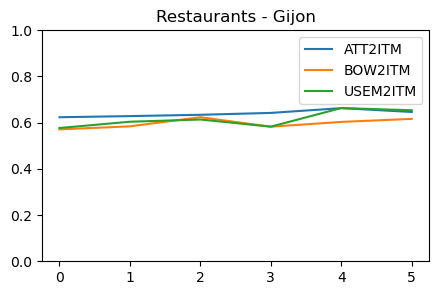

   train_dev_items   ATT2ITM  n_samples   BOW2ITM  USEM2ITM
0                0  0.510029       9532  0.443774  0.475709
1                1  0.520511       4350  0.453851  0.478757
2                2  0.519426       2855  0.466108  0.477836
3                3  0.518890       2025  0.455698  0.478468
4                4  0.501235       1554  0.447760  0.480129
5                5  0.523698       1238  0.477786  0.495050


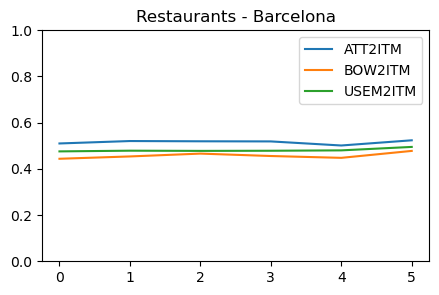

   train_dev_items   ATT2ITM  n_samples   BOW2ITM  USEM2ITM
0                0  0.537192      13282  0.473347  0.500734
1                1  0.559918       6673  0.496756  0.517919
2                2  0.563428       4259  0.500065  0.517672
3                3  0.571939       3090  0.508576  0.527174
4                4  0.569562       2350  0.516187  0.525653
5                5  0.567976       1896  0.500876  0.518300


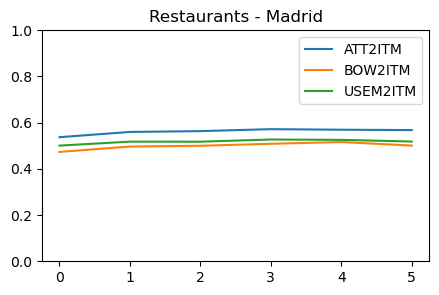

   train_dev_items   ATT2ITM  n_samples   BOW2ITM  USEM2ITM
0                0  0.447087      24995  0.370217  0.409151
1                1  0.454991      11502  0.377558  0.416027
2                2  0.461209       7062  0.382437  0.415071
3                3  0.467758       4747  0.391246  0.421914
4                4  0.479393       3727  0.400463  0.430784
5                5  0.464957       2862  0.393075  0.433074


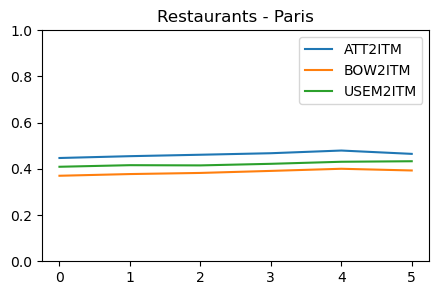

   train_dev_items   ATT2ITM  n_samples   BOW2ITM  USEM2ITM
0                0  0.603239      24606  0.517983  0.593896
1                1  0.612136      14985  0.527708  0.594890
2                2  0.613769       9893  0.532017  0.597583
3                3  0.624434       6749  0.539534  0.605164
4                4  0.621919       4860  0.534994  0.600084
5                5  0.616729       3330  0.536583  0.595894


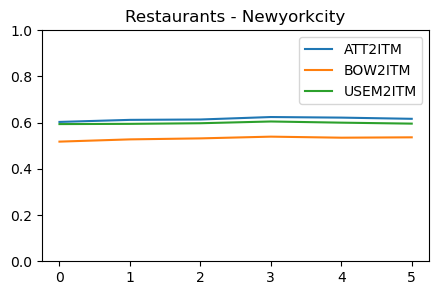

   train_dev_items   ATT2ITM  n_samples   BOW2ITM  USEM2ITM
0                0  0.872562       2826  0.856592  0.872320
1                1  0.886092       1981  0.876107  0.883009
2                2  0.864392       1422  0.853963  0.865714
3                3  0.878306       1045  0.860448  0.876539
4                4  0.849713        859  0.840301  0.852866
5                5  0.836512        625  0.819430  0.842058


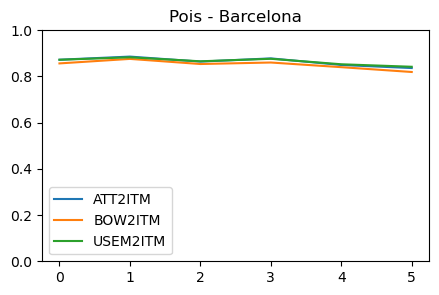

   train_dev_items   ATT2ITM  n_samples   BOW2ITM  USEM2ITM
0                0  0.873041       4194  0.848406  0.875965
1                1  0.884148       2733  0.857178  0.878507
2                2  0.871693       1927  0.849788  0.872781
3                3  0.873784       1405  0.850729  0.875631
4                4  0.875844       1019  0.849373  0.863128
5                5  0.865704        820  0.848638  0.860025


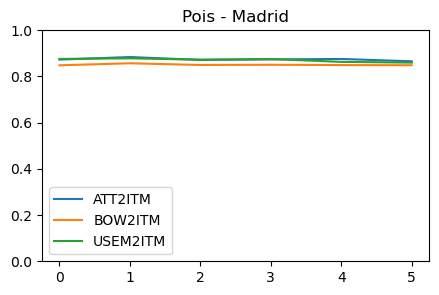

   train_dev_items   ATT2ITM  n_samples   BOW2ITM  USEM2ITM
0                0  0.905654       1335  0.887490  0.911077
1                1  0.904355       1191  0.882346  0.908365
2                2  0.906979       1165  0.880321  0.908237
3                3  0.907978        999  0.892980  0.921760
4                4  0.881842        787  0.878994  0.897505
5                5  0.896208        622  0.873173  0.907966


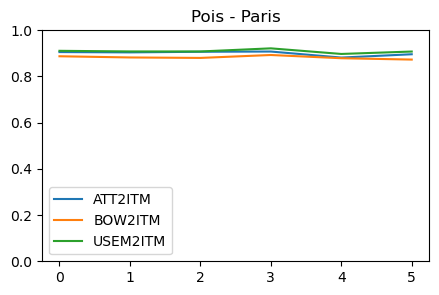

   train_dev_items   ATT2ITM  n_samples   BOW2ITM  USEM2ITM
0                0  0.867111       1511  0.848059  0.875521
1                1  0.891784       1313  0.867008  0.896575
2                2  0.889000       1346  0.859483  0.897597
3                3  0.887981       1181  0.862066  0.893858
4                4  0.886043       1060  0.860517  0.885445
5                5  0.885136        844  0.857860  0.884537


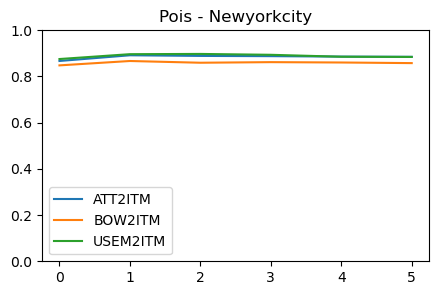

   train_dev_items   ATT2ITM  n_samples   BOW2ITM  USEM2ITM
0                0  0.890573       1198  0.867688  0.891708
1                1  0.896129       1142  0.873681  0.879687
2                2  0.876136        904  0.852830  0.882006
3                3  0.882277        743  0.860302  0.892540
4                4  0.889133        587  0.861781  0.875738
5                5  0.882347        436  0.853157  0.883734


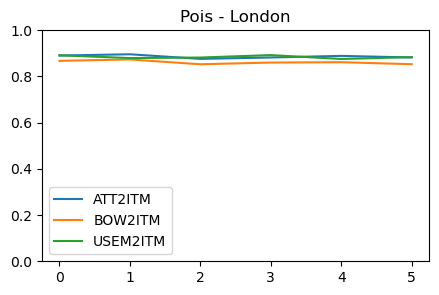

   train_dev_items   ATT2ITM  n_samples   BOW2ITM  USEM2ITM
0                0  0.543105      15468  0.460680  0.171398
1                1  0.619931       3263  0.561738  0.330992
2                2  0.561222        504  0.460231  0.201995
3                3  0.626869        444  0.541419  0.258778
4                4  0.523842         29  0.451688  0.193572
5                5  0.405958         35  0.322767  0.144336


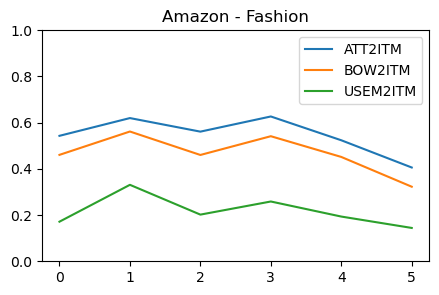

   train_dev_items   ATT2ITM  n_samples   BOW2ITM  USEM2ITM
0                0  0.524603      14925  0.438658  0.178098
1                1  0.601652       5164  0.537455  0.149381
2                2  0.543727       1293  0.463537  0.149164
3                3  0.535374        696  0.466753  0.149068
4                4  0.505019        360  0.452175  0.149325
5                5  0.488397        231  0.423337  0.139377


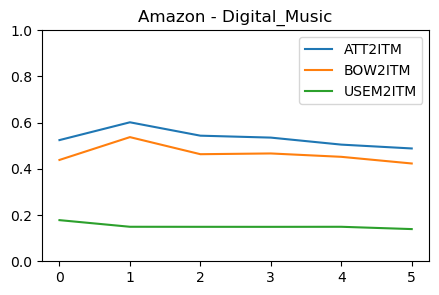

In [8]:
# Importar pandas
import matplotlib.pyplot as plt
import pandas as pd
import os

top = 5
datasets = {"restaurants":["gijon", "barcelona", "madrid", "paris", "newyorkcity"],
            "pois":["barcelona", "madrid", "paris", "newyorkcity", "london"],
            "amazon":["fashion", "digital_music"]}
models = ["ATT2ITM", "BOW2ITM", "USEM2ITM"]

best_model = pd.read_csv("models/best_models.csv")

for dataset, subsets in datasets.items():
    for subset in subsets:
        subset_results = pd.DataFrame(range(top+1), columns=["train_dev_items"])
        fig, ax = plt.subplots(figsize=(5, 3))
        for model in models:
            md5 = best_model.loc[(best_model.dataset == dataset) & (best_model.subset == subset) & (best_model.model == model)]["model_md5"].values[0]
            results_path = f"models/{model}/{dataset}/{subset}/{md5}/final_eval.csv"
            if os.path.exists(results_path):
                results = pd.read_csv(results_path)
                results = results.groupby("cold").agg(mn=("NDCG", "mean"), n_samples=("NDCG", "count")).reset_index().rename(columns={"cold":"train_dev_items", "mn":model})
                # results = results.groupby("cold")["NDCG"].mean().reset_index().rename(columns={"cold":"train_dev_items", "NDCG":model})
                subset_results = subset_results.merge(results, how="left")

                ax.plot(subset_results["train_dev_items"], subset_results[model], label=model)
            else:
                raise ValueError
        print(subset_results)

        ax.plot(subset_results["train_dev_items"], subset_results["n_samples"])

        plt.ylim([0, 1])
        plt.title(f"{dataset.title()} - {subset.title()}")
        plt.legend()
        plt.show()

In [31]:
pd.read_csv(results_path)

,Unnamed: 0,reviewId,userId,id_item,name,bow,seq,NDCG,cold
0,0,671654,A2SDJZO3FETVB6,28,0,190384,190384,0.115402,0.0
1,1,737226,AFMRW65TM4JJ8,28,0,191776,191776,0.115593,0.0
2,2,692707,AIQQ7VJMHV47L,28,0,194096,194096,0.114530,0.0
3,3,816010,A2YTSM9WLL9Z1E,718,0,197562,197562,0.102851,1.0
4,4,299086,A2L8YG5P5EKCKY,242,0,198445,198445,0.101188,2.0
...,...,...,...,...,...,...,...,...,...
23430,23430,93788,A1WDPC01O99OGV,335,0,238727,238727,0.110802,0.0
23431,23431,345400,A2O8IB4KMYW05Z,314,0,238728,238728,0.102235,2.0
23432,23432,1085584,AGEW8TWYQCN6M,894,0,238729,238729,0.185449,0.0
23433,23433,156470,AGY7P1W3JWLSX,296,0,238730,238730,0.185449,0.0


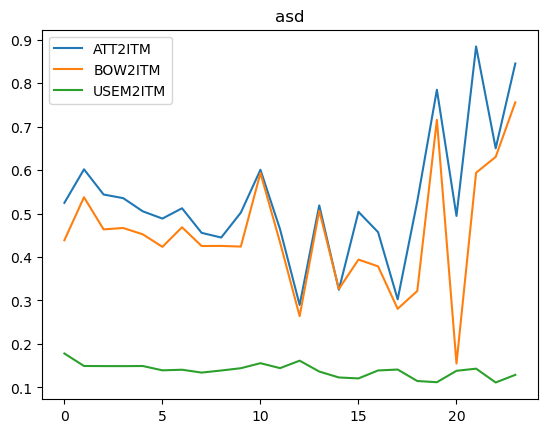

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for model in models:
    ax.plot(subset_results["train_dev_items"], subset_results[model], label=model)

plt.title("asd")
plt.legend()
plt.show()

In [5]:
subset_results

,train_dev_items,ATT2ITM,BOW2ITM,USEM2ITM
0,0,0.524603,0.438658,0.178098
1,1,0.601652,0.537455,0.149381
2,2,0.543727,0.463537,0.149164
3,3,0.535374,0.466753,0.149068
4,4,0.505019,0.452175,0.149325
5,5,0.488397,0.423337,0.139377
6,6,0.512085,0.468437,0.140776
7,7,0.455558,0.425268,0.134205
8,8,0.444787,0.425523,0.138979
9,9,0.502080,0.424005,0.144287
